In [1]:
import torch, torchvision
import torchvision.transforms.functional as fn
torch.manual_seed(0)

import os
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Update os
path = "/home/kishen/documents/python_projects/dogs_v_cats/"
os.chdir(path)

from src.dataset import ImageDataset

### Create experiment/ data loader

In [3]:
#create 20 labels: cats = 0, dogs =1 
labels  = np.zeros(20)
labels[10:] = 1

#calculated mean and std
mean = torch.tensor([132.6941, 123.1813, 112.1255], dtype=torch.float64)
std = torch.tensor([58.6362, 57.4448, 57.9221], dtype=torch.float64)

#create augmetations for exp_data
augmentations = torch.nn.Sequential(
    torchvision.transforms.Resize((128, 128)),
    torchvision.transforms.Normalize(mean = mean,
                                    std= std)
)

#create dataset
exp_data = ImageDataset(image_paths=  "/home/kishen/documents/python_projects/dogs_v_cats/data/experiment/",
                        targets=labels,
                        augmentations= augmentations)
            


In [4]:
# #calcualte mean and std from trainig dataset
# from src.dataset import calculate_img_mean, calculate_img_std

# mean = calculate_img_mean(exp_data)
# std = calculate_img_std(exp_data)

In [5]:
from torch.utils.data import DataLoader

dl_params = {"dataset": exp_data,
             "batch_size":1,
             "shuffle": True,}

exp_loader = DataLoader(**dl_params)

In [6]:
from src.models import BaseConvNet, train, accuracy

model = BaseConvNet()
train_params = {'model': model, 
                'loader': exp_loader, 
                'epochs': 125, 
                'criterion': torch.nn.BCEWithLogitsLoss(),
                'optimizer': torch.optim.SGD(model.parameters(), lr= 1e-3, momentum=0, weight_decay=.5)}



In [7]:
loss, acc = train(**train_params)

/home/kishen/documents/python_projects/dogs_v_cats/src/dataset.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "image": torch.tensor(image),


Loss for Epoch 1: 0.729
Accuracy: 50.0
Loss for Epoch 2: 0.736
Accuracy: 50.0
Loss for Epoch 3: 0.727
Accuracy: 50.0
Loss for Epoch 4: 0.729
Accuracy: 50.0
Loss for Epoch 5: 0.717
Accuracy: 50.0
Loss for Epoch 6: 0.729
Accuracy: 50.0
Loss for Epoch 7: 0.707
Accuracy: 50.0
Loss for Epoch 8: 0.702
Accuracy: 50.0
Loss for Epoch 9: 0.711
Accuracy: 50.0
Loss for Epoch 10: 0.721
Accuracy: 50.0
Loss for Epoch 11: 0.717
Accuracy: 50.0
Loss for Epoch 12: 0.715
Accuracy: 50.0
Loss for Epoch 13: 0.707
Accuracy: 50.0
Loss for Epoch 14: 0.703
Accuracy: 50.0
Loss for Epoch 15: 0.696
Accuracy: 50.0
Loss for Epoch 16: 0.705
Accuracy: 50.0
Loss for Epoch 17: 0.688
Accuracy: 50.0
Loss for Epoch 18: 0.701
Accuracy: 50.0
Loss for Epoch 19: 0.693
Accuracy: 50.0
Loss for Epoch 20: 0.698
Accuracy: 50.0
Loss for Epoch 21: 0.693
Accuracy: 50.0
Loss for Epoch 22: 0.68
Accuracy: 50.0
Loss for Epoch 23: 0.68
Accuracy: 50.0
Loss for Epoch 24: 0.67
Accuracy: 50.0
Loss for Epoch 25: 0.69
Accuracy: 50.0
Loss for Epoc

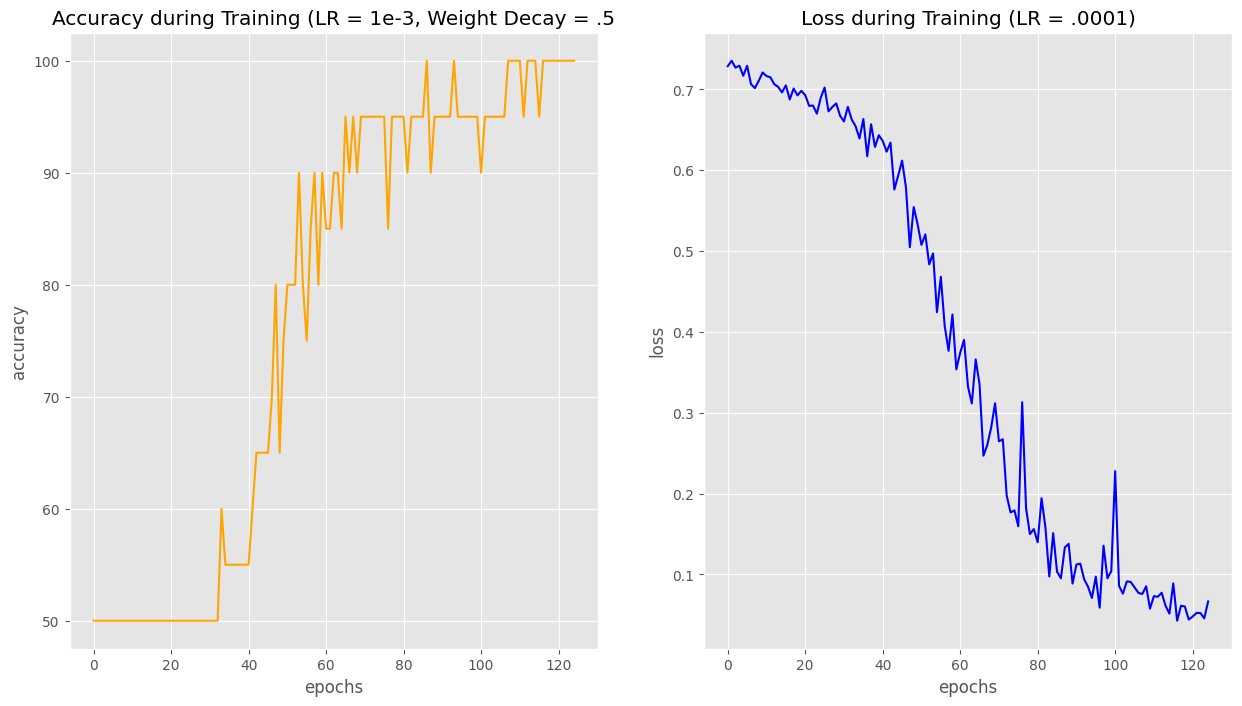

In [8]:
f, ax = plt.subplots(1,2,figsize = (15, 8))

ax[0].plot(acc, color = 'orange')
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy during Training (LR = 1e-3, Weight Decay = .5")

ax[1].plot(loss, color = 'blue')
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("loss")
ax[1].set_title("Loss during Training (LR = .0001)");
